# Classification of MNIST-like Fashion Image

By: [Hanzholah Shobri](https://www.github.com/hanzholahs)

Date: 20 August 2022

Here, I implemented a Convolutional Neural Network in TensorFlow 2 to predict the classes of fashion MNIST-like image. As a result, the model achieved the 91% accuracy.

# Data Description 

Source: [Kaggle Fashion MNIST by Zalando Research](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

Fashion-MNIST is a dataset like MNIST dataset, but instead of handwritten number digits, the dataset contains fashion images. Each image is a grayscale image with 28x28 dimension, associated with 10 different labels of fashion classes. The pixel value is in between 0 and 255 indicating the lightness or darkness of the pixel (higher number means darker pixel). The images are stored in a table format with each image represent the rows of the table. The columns represent 1 label and 784 pixels of the associated image. There are 60000 images in the training dataset and 10000 images in the test dataset.

## Labels
Each training and test example is assigned to one of the following labels:

|Label  |Description| |Label|Description|
|--     |--         |-|--   |--         |
|0      |T-shirt/top| |5    |Sandal     |
|1      |Trouser    | |6    |Shirt      | 
|2      |Pullover   | |7    |Sneaker    |
|3      |Dress      | |8    |Bag        |
|4      |Coat       | |9    |Ankle boot |

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df_train = pd.read_csv("data/fashion-mnist_train.csv")
df_test  = pd.read_csv("data/fashion-mnist_test.csv")

print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = np.array(df_train.drop("label", axis = 1), dtype = float)
X_train = X_train.reshape(df_train.shape[0], 28, 28, 1)
y_train = df_train.label

X_test = np.array(df_test.drop("label", axis = 1), dtype = float)
X_test = X_test.reshape(df_test.shape[0], 28, 28, 1)
y_test = df_test.label

X_train, X_test = X_train / 255., X_test / 255.

label_names = np.array([
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=123)

y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

# Visualisation

Image Label: 8 (Bag)


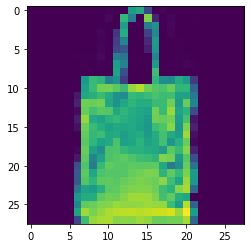

In [6]:
index = 65
img = X_train[index]

print(f"Image Label: {y_train[index]} ({label_names[y_train[index]]})")
plt.imshow(img)

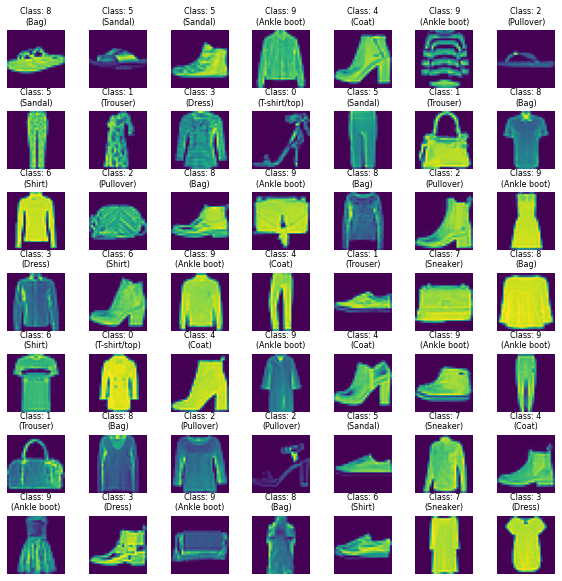

In [7]:
length = 7

fig, axes = plt.subplots(length, length, figsize = (10, 10))
plt.subplots_adjust(hspace=0.4)

axes = axes.ravel()

for i in np.arange(0, length ** 2):
    index, label = np.random.randint(0, len(X_train)), y_train[index]
    
    axes[i].imshow(X_train[index])
    axes[i].set_title(f"Class: {label}\n({label_names[label]})", fontsize = 8)
    axes[i].axis("off")

# Model Training

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = "relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(32, activation = "relu"),
    Dense(10, activation = "sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer = Adam(lr=0.001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [10]:
model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 512, epochs = 30, verbose = 2)

Epoch 1/30
100/100 - 6s - loss: 0.8817 - accuracy: 0.6989 - val_loss: 0.5127 - val_accuracy: 0.8164
Epoch 2/30
100/100 - 5s - loss: 0.4811 - accuracy: 0.8311 - val_loss: 0.4340 - val_accuracy: 0.8468
Epoch 3/30
100/100 - 5s - loss: 0.4134 - accuracy: 0.8574 - val_loss: 0.3918 - val_accuracy: 0.8602
Epoch 4/30
100/100 - 5s - loss: 0.3843 - accuracy: 0.8653 - val_loss: 0.3707 - val_accuracy: 0.8678
Epoch 5/30
100/100 - 6s - loss: 0.3599 - accuracy: 0.8746 - val_loss: 0.3460 - val_accuracy: 0.8762
Epoch 6/30
100/100 - 6s - loss: 0.3456 - accuracy: 0.8798 - val_loss: 0.3469 - val_accuracy: 0.8758
Epoch 7/30
100/100 - 6s - loss: 0.3349 - accuracy: 0.8837 - val_loss: 0.3422 - val_accuracy: 0.8781
Epoch 8/30
100/100 - 5s - loss: 0.3188 - accuracy: 0.8881 - val_loss: 0.3160 - val_accuracy: 0.8864
Epoch 9/30
100/100 - 5s - loss: 0.3079 - accuracy: 0.8917 - val_loss: 0.3138 - val_accuracy: 0.8874
Epoch 10/30
100/100 - 5s - loss: 0.2977 - accuracy: 0.8970 - val_loss: 0.3025 - val_accuracy: 0.8898

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2588 - accuracy: 0.9112


[0.25876832008361816, 0.9111999869346619]

In [12]:
y_pred = np.argmax(model.predict(X_test), axis = 1)

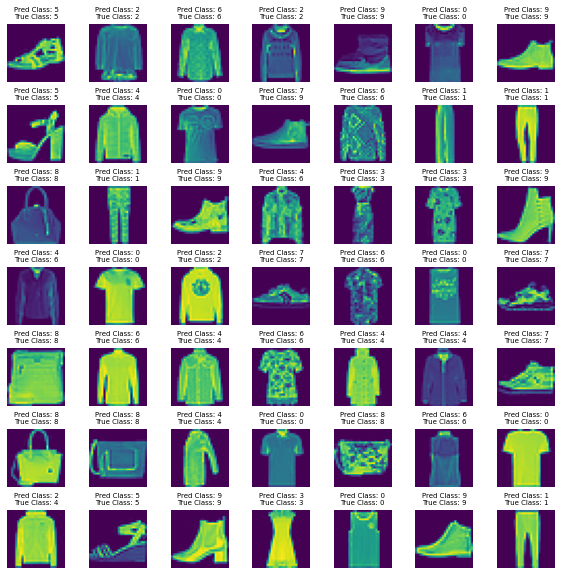

In [13]:
length = 7

fig, axes = plt.subplots(length, length, figsize = (10, 10))
plt.subplots_adjust(hspace=0.4)

axes = axes.ravel()

for i in np.arange(0, length ** 2):
    index = np.random.randint(0, len(X_test))
    axes[i].imshow(X_test[index])
    axes[i].set_title(f"Pred Class: {y_pred[index]}\nTrue Class: {y_test[index]}", fontsize = 7)
    axes[i].axis("off")

# Evaluation

<AxesSubplot:>

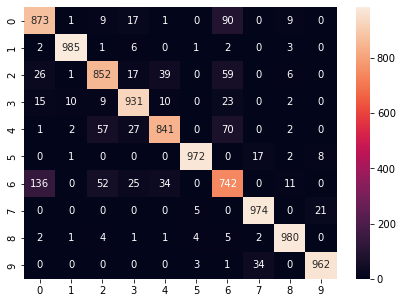

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (7, 5))
sns.heatmap(cm, annot = True, fmt='g')

In [15]:
print(classification_report(y_test, y_pred, target_names = label_names))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.91      0.84      0.87      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.75      0.74      0.74      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

